# Day 3: Text representation - Word Vectorization & Embeddings

## What is vectorization?
Vectorization is a process of converting input text data into vectors of real numbers which is the format that ML models support.



## 1. Bag of Words

It involves three major steps [Tokenization], Vocabulary creation and Vector creation (via considering frequency of vocabulary words in a given document).


In [6]:
# Bag of Words Example
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
    'The quick brown fox jumps over the lazy dog',
    'Never jump over the lazy dog quickly',
    'A fox is quick and brown'
 ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

#Let’s print the vocabulary to understand why it looks like this.
print(sorted(vectorizer.vocabulary_.keys()))

# The X returned by fit_transform is a sparse matrix for memory efficiency.
# .toarray() converts this sparse matrix to a dense NumPy array, so we can easily create a DataFrame.
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow)
df_bow

# N-gram (Bigram) Vectorization
# N-grams are contiguous sequences of n items (words) from a given text. Using n-grams (bigrams, trigrams, etc.) can capture more context than single words.
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
X_bigram = vectorizer_bigram.fit_transform(corpus)
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=vectorizer_bigram.get_feature_names_out())
df_bigram

[[0 1 1 1 0 0 1 1 0 1 1 0 2]
 [0 0 1 0 0 1 0 1 1 1 0 1 1]
 [1 1 0 1 1 0 0 0 0 0 1 0 0]]
['and', 'brown', 'dog', 'fox', 'is', 'jump', 'jumps', 'lazy', 'never', 'over', 'quick', 'quickly', 'the']
   and  brown  dog  fox  is  jump  jumps  lazy  never  over  quick  quickly  \
0    0      1    1    1   0     0      1     1      0     1      1        0   
1    0      0    1    0   0     1      0     1      1     1      0        1   
2    1      1    0    1   1     0      0     0      0     0      1        0   

   the  
0    2  
1    1  
2    0  


,and brown,brown fox,dog quickly,fox is,fox jumps,is quick,jump over,jumps over,lazy dog,never jump,over the,quick and,quick brown,the lazy,the quick
0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,1
1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0


## 2. Term Frequency–Inverse Document Frequency (TF-IDF)


TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

It weighs the frequency of a word in a document against its frequency in the entire corpus, reducing the impact of common words.

Key Points:
- TF (Term Frequency): Measures how frequently a term occurs in a document.
- IDF (Inverse Document Frequency): Measures how important a term is, based on how common or rare it is across all documents.
- TF-IDF = TF * IDF
- Commonly used for text mining, information retrieval, and feature extraction in NLP.

References:
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://medium.com/analytics-vidhya/understanding-tf-idf-in-nlp-4a28eebdee6a

- https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

Practical Usage:
- Used to convert text documents into numerical feature vectors for ML models.
- Helps reduce the impact of common words and highlight important terms.

Real Example:
-------------
Suppose we have the following corpus:
    doc1 = "the cat sat on the mat"
    doc2 = "the dog sat on the log"
    doc3 = "cats and dogs are animals"

Let's calculate TF-IDF for the word "cat" in doc1:
- TF("cat", doc1) = 1/6 ("cat" appears once, 6 words in doc1)
- IDF("cat") = log(3 / (number of docs containing "cat")) = log(3/1) = 1.0986
- TF-IDF("cat", doc1) = TF * IDF = (1/6) * 1.0986 ≈ 0.183

This means "cat" is somewhat important in doc1, but if it appeared in all documents, its IDF would be lower, reducing its TF-IDF score.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample corpus
corpus = [
    'The quick brown fox jumps over the lazy dog',
    'Never jump over the lazy dog quickly',
    'A fox is quick and brown'
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame for easy viewing
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print('TF-IDF Matrix:')
print(df_tfidf.round(2))

# Show vocabulary and IDF values
print('\nVocabulary:', vectorizer.vocabulary_)
print('IDF values:', dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_)))

# Example: Get TF-IDF score for 'fox' in each document
for i, doc in enumerate(corpus):
    print(f"TF-IDF for 'fox' in doc {i}: {df_tfidf.loc[i, 'fox']}")

TF-IDF Matrix:
    and  brown   dog   fox    is  jump  jumps  lazy  never  over  quick  \
0  0.00   0.29  0.29  0.29  0.00  0.00   0.38  0.29   0.00  0.29   0.29   
1  0.00   0.00  0.33  0.00  0.00  0.43   0.00  0.33   0.43  0.33   0.00   
2  0.52   0.39  0.00  0.39  0.52  0.00   0.00  0.00   0.00  0.00   0.39   

   quickly   the  
0     0.00  0.58  
1     0.43  0.33  
2     0.00  0.00  

Vocabulary: {'the': 12, 'quick': 10, 'brown': 1, 'fox': 3, 'jumps': 6, 'over': 9, 'lazy': 7, 'dog': 2, 'never': 8, 'jump': 5, 'quickly': 11, 'is': 4, 'and': 0}
IDF values: {'and': 1.6931471805599454, 'brown': 1.2876820724517808, 'dog': 1.2876820724517808, 'fox': 1.2876820724517808, 'is': 1.6931471805599454, 'jump': 1.6931471805599454, 'jumps': 1.6931471805599454, 'lazy': 1.2876820724517808, 'never': 1.6931471805599454, 'over': 1.2876820724517808, 'quick': 1.2876820724517808, 'quickly': 1.6931471805599454, 'the': 1.2876820724517808}
TF-IDF for 'fox' in doc 0: 0.2919921610643988
TF-IDF for 'fox' in doc

## 3. [Word2Vec](https://arxiv.org/pdf/1301.3781.pdf)

Traditional vectorization methods like Bag-of-Words and TF-IDF create high-dimensional, sparse vectors and do not capture word meaning or context. In earlier two methods, semantics were completely ignored. With the introduction of Word2Vec, the vector representation of words was said to be contextually aware, probably for the first time ever. Word embeddings (Word2Vec, GloVe, FastText) create dense, low-dimensional vectors that capture semantic relationships between words.

Word2Vec is a neural network-based algorithm for learning distributed representations of words (word embeddings).
It was introduced by Mikolov et al. (2013) and is widely used in NLP.

Algorithm Details:
There are two main architectures:
1. CBOW (Continuous Bag of Words):
   - Objective: Predict the target word from its context words.
   - For each position in the text, the model takes the context (surrounding words) and tries to predict the center word.
   - The context words are averaged (or summed) and fed into a shallow neural network to predict the target word.
   - Loss function: Negative log likelihood of the target word given the context.

2. Skip-gram:
   - Objective: Predict context words from the target word.
   - For each word in the text, the model tries to predict the surrounding context words.
   - The target word is fed into a shallow neural network to predict each context word.
   - Loss function: Negative log likelihood of the context words given the target word.

Both architectures use a shallow neural network with one hidden layer. The weights of the hidden layer become the word embeddings.
Training is typically done using stochastic gradient descent and techniques like negative sampling or hierarchical softmax to speed up computation.

CBOW is faster and works well with smaller datasets, while Skip-gram is better for rare words and larger datasets.

References:
- https://arxiv.org/pdf/1301.3781.pdf
- https://radimrehurek.com/gensim/models/word2vec.html






[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



CBOW: Vector for 'fox': [ 1.9926233e-02  1.1101884e-02 -7.1814950e-03  1.8871257e-02
 -3.1043659e-05  3.1856336e-05 -2.6575399e-03 -1.4247577e-02
  1.7378081e-02 -1.9446058e-02 -1.3024067e-02 -1.0813247e-02
 -8.8271722e-03 -1.4725180e-02 -1.9280376e-02  7.1101100e-03
  1.8775824e-02 -1.5127726e-02 -8.1425533e-03  2.5381582e-04
  1.7100409e-02  7.7720736e-03  1.0646924e-02  3.2423157e-03
 -3.3165808e-03 -1.2011361e-02  1.4578517e-02  1.2161628e-02
 -1.8995134e-02  8.6184628e-03 -1.6627541e-02  9.5618321e-03
  1.3038698e-02 -1.4758910e-02 -2.6465615e-03 -1.5052079e-02
  2.6896102e-03  1.7100506e-02 -1.6766673e-02 -4.0978324e-03
  1.8929016e-02 -7.9604853e-03 -1.4712090e-02 -4.5621203e-04
  3.3787650e-04  6.5129385e-03 -7.4531939e-03  1.8223394e-02
  8.4008987e-04 -8.5435817e-03]
CBOW: Most similar to 'fox': [('dogs', 0.13823334872722626), ('over', 0.11439217627048492), ('quickly', 0.07609569281339645), ('foxes', 0.07189159840345383), ('never', 0.0033666829112917185), ('jumps', -0.031314

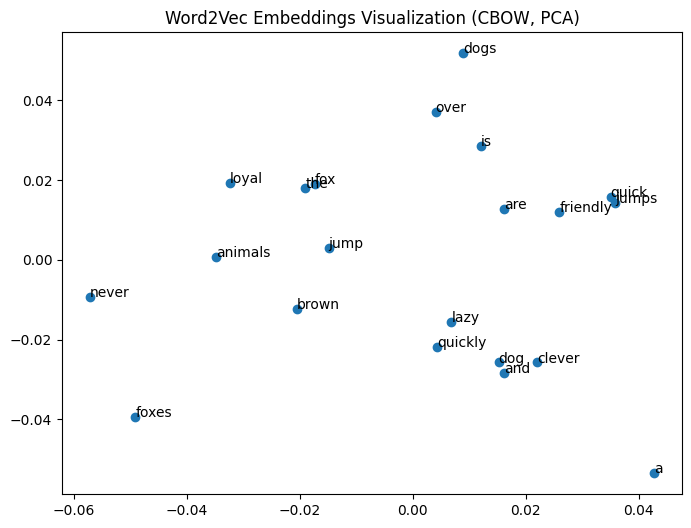

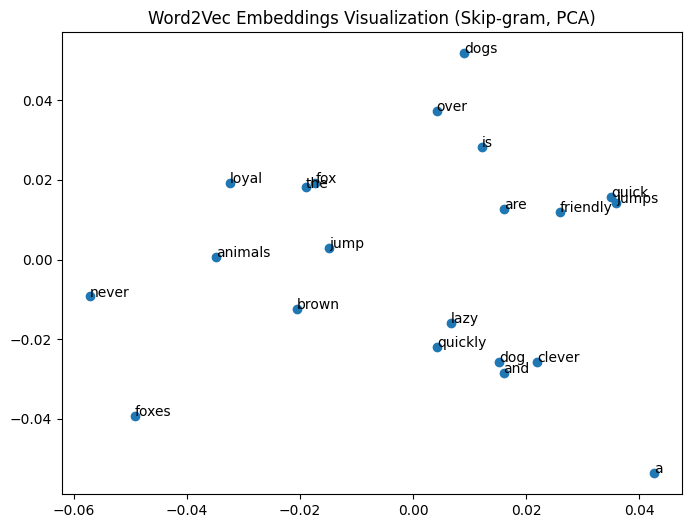

In [8]:
# Upgrade pip, setuptools, wheel and install gensim
%pip install --upgrade pip setuptools wheel
%pip install gensim

from gensim.models import Word2Vec, KeyedVectors
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# Download punkt for tokenization
nltk.download('punkt_tab')

# Sample corpus
corpus = [
    'The quick brown fox jumps over the lazy dog',
    'Never jump over the lazy dog quickly',
    'A fox is quick and brown',
    'Dogs and foxes are animals',
    'Foxes are clever and quick',
    'Dogs are loyal and friendly'
]

# Tokenize sentences
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# --- CBOW Example ---
# In gensim, CBOW is the default (sg=0)
cbow_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    min_count=1,
    workers=1,
    sg=0,  # CBOW
    seed=42
)
cbow_model.save('word2vec_cbow.model')
cbow_loaded = Word2Vec.load('word2vec_cbow.model')
print("\nCBOW: Vector for 'fox':", cbow_loaded.wv['fox'])
print("CBOW: Most similar to 'fox':", cbow_loaded.wv.most_similar('fox'))

# --- Skip-gram Example ---
# In gensim, sg=1 means Skip-gram
skipgram_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    min_count=1,
    workers=1,
    sg=1,  # Skip-gram
    seed=42
)
skipgram_model.save('word2vec_skipgram.model')
skipgram_loaded = Word2Vec.load('word2vec_skipgram.model')
print("\nSkip-gram: Vector for 'fox':", skipgram_loaded.wv['fox'])
print("Skip-gram: Most similar to 'fox':", skipgram_loaded.wv.most_similar('fox'))

# --- Visualization (CBOW) ---
words = list(cbow_loaded.wv.index_to_key)
word_vectors = cbow_loaded.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title('Word2Vec Embeddings Visualization (CBOW, PCA)')
plt.show()

# --- Visualization (Skip-gram) ---
words_sg = list(skipgram_loaded.wv.index_to_key)
word_vectors_sg = skipgram_loaded.wv[words_sg]
pca_sg = PCA(n_components=2)
result_sg = pca_sg.fit_transform(word_vectors_sg)
plt.figure(figsize=(8,6))
plt.scatter(result_sg[:, 0], result_sg[:, 1])
for i, word in enumerate(words_sg):
    plt.annotate(word, xy=(result_sg[i, 0], result_sg[i, 1]))
plt.title('Word2Vec Embeddings Visualization (Skip-gram, PCA)')
plt.show()

# --- Analogy Example (CBOW) ---
if all(w in cbow_loaded.wv for w in ['king', 'man', 'woman']):
    result = cbow_loaded.wv.most_similar(positive=['king', 'woman'], negative=['man'])
    print('CBOW Analogy: king - man + woman =', result[0][0])

# --- Analogy Example (Skip-gram) ---
if all(w in skipgram_loaded.wv for w in ['king', 'man', 'woman']):
    result = skipgram_loaded.wv.most_similar(positive=['king', 'woman'], negative=['man'])
    print('Skip-gram Analogy: king - man + woman =', result[0][0])

# Using Pretrained Word2Vec (Google News, if available)
# Download from https://code.google.com/archive/p/word2vec/ (if needed)






### 4. Global Vectors for word representation [(GloVe)](https://nlp.stanford.edu/pubs/glove.pdf)
It is also based on creating contextual word embeddings. Word2Vec is a window-based method, in which the model relies on local information for generating word embeddings, which in turn is limited to the window size that we choose. GloVe on the other hand captures both global and local statistics in order to come up with the word embeddings.

It is an unsupervised learning algorithm for obtaining vector representations for words.
It was developed by Stanford (Pennington et al., 2014).

Algorithm Details:
- GloVe builds a global word-word co-occurrence matrix from the corpus.
- For each word pair (i, j), it counts how often word j appears in the context of word i.
- The model learns word vectors such that the dot product of two word vectors approximates the logarithm of the probability of their co-occurrence:
    w_i^T w_j + b_i + b_j ≈ log(X_ij)
  where X_ij is the co-occurrence count, w_i and w_j are word vectors, and b_i, b_j are biases.
- The objective function minimizes the weighted least squares error over all word pairs.
- GloVe is a count-based model (unlike predictive models like Word2Vec).

References:
- https://nlp.stanford.edu/projects/glove/
- https://nlp.stanford.edu/pubs/glove.pdf

Practical Usage:
- Pretrained GloVe vectors are available for many languages and domains.
- Common use: Load pretrained vectors and use them for NLP tasks (similarity, analogy, downstream ML, etc).


Cosine similarity between fox and dog: 0.45282263
Most similar to "dog": [('cat', 0.92180043), ('dogs', 0.8513158), ('horse', 0.7907583), ('puppy', 0.77549213), ('pet', 0.7724708)]
king - man + woman = queen


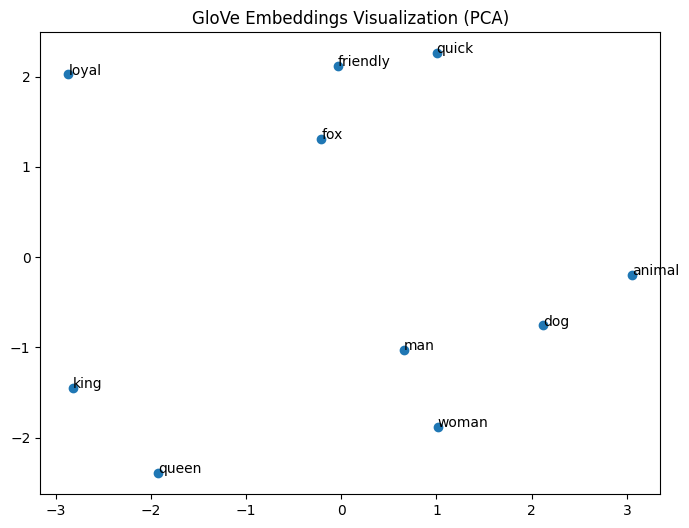

Document vector shape: (50,)


In [9]:
import numpy as np
import requests, zipfile, io, os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download GloVe embeddings (small sample for demo)
glove_file = 'glove.6B.50d.txt'
if not os.path.exists(glove_file):
    url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extract(glove_file)

# Load GloVe vectors
glove_vectors = {}
with open(glove_file, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

# Example: Get vector for 'fox' and find cosine similarity with 'dog'
from numpy.linalg import norm
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

vec_fox = glove_vectors['fox']
vec_dog = glove_vectors['dog']
print('Cosine similarity between fox and dog:', cosine_similarity(vec_fox, vec_dog))

# Find most similar words to 'dog' using GloVe
def most_similar(word, vectors, topn=5):
    word_vec = vectors[word]
    similarities = {}
    for w, v in vectors.items():
        if w != word:
            similarities[w] = cosine_similarity(word_vec, v)
    return sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:topn]

print('Most similar to "dog":', most_similar('dog', glove_vectors))

# Analogy: king - man + woman = ?
def analogy(word_a, word_b, word_c, vectors):
    result_vec = vectors[word_a] - vectors[word_b] + vectors[word_c]
    similarities = {}
    for w, v in vectors.items():
        similarities[w] = cosine_similarity(result_vec, v)
    # Exclude input words
    for w in [word_a, word_b, word_c]:
        similarities.pop(w, None)
    return sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:1]

if all(w in glove_vectors for w in ['king', 'man', 'woman']):
    print('king - man + woman =', analogy('king', 'man', 'woman', glove_vectors)[0][0])

# Visualize GloVe embeddings using PCA
words = ['dog', 'fox', 'king', 'queen', 'man', 'woman', 'animal', 'friendly', 'loyal', 'quick']
word_vecs = np.array([glove_vectors[w] for w in words if w in glove_vectors])
pca = PCA(n_components=2)
result = pca.fit_transform(word_vecs)
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate([w for w in words if w in glove_vectors]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title('GloVe Embeddings Visualization (PCA)')
plt.show()

# Integration: Use GloVe vectors in downstream ML tasks (e.g., averaging for document vectors)
def document_vector(doc, vectors):
    words = doc.lower().split()
    valid_vecs = [vectors[w] for w in words if w in vectors]
    if valid_vecs:
        return np.mean(valid_vecs, axis=0)
    else:
        return np.zeros(vectors[next(iter(vectors))].shape)

sample_doc = 'The quick brown fox jumps over the lazy dog'
doc_vec = document_vector(sample_doc, glove_vectors)
print('Document vector shape:', doc_vec.shape)

### 5. Doc2Vec

Doc2Vec (Paragraph Vector) is an extension of Word2Vec for learning vector representations of documents (sentences, paragraphs, or entire texts).
It was introduced by Le & Mikolov (2014).

Algorithm Details:
Doc2Vec learns fixed-length feature representations for variable-length pieces of text. There are two main models:
1. Distributed Memory (DM):
   - Objective: Predict a target word using both context words and a unique document id.
   - The document vector acts as a memory that provides additional context for prediction (similar to CBOW).
   - Both word vectors and document vectors are updated during training.
   - Loss function: Negative log likelihood of the target word given context and document id.

2. Distributed Bag of Words (DBOW):
   - Objective: Predict words in the document using only the document id (ignores context).
   - The model tries to predict words randomly sampled from the document using the document vector (similar to Skip-gram).
   - Only document vectors are updated during training.
   - Loss function: Negative log likelihood of the context words given the document id.

Doc2Vec is useful for document similarity, classification, clustering, and retrieval.

References:
- https://arxiv.org/pdf/1405.4053.pdf
- https://radimrehurek.com/gensim/models/doc2vec.html

In [10]:
# Doc2Vec Example with Gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')

corpus = [
    'The quick brown fox jumps over the lazy dog',
    'Never jump over the lazy dog quickly',
    'A fox is quick and brown'
 ]

# Tag documents
tagged_data = [TaggedDocument(words=nltk.word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(corpus)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=1, epochs=40, seed=42)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get vector for first document
print('Vector for first document:', doc2vec_model.dv['0'])

# Find most similar documents
print('Most similar to first document:', doc2vec_model.dv.most_similar('0'))

Vector for first document: [ 1.66905001e-02  1.92174446e-02  1.62792075e-02 -1.51894921e-02
 -1.68122742e-02 -8.75416026e-03 -8.41222517e-03  8.84875841e-03
 -1.37816053e-02 -1.71922203e-02 -9.35497042e-03  1.98246539e-02
 -9.44866799e-03  3.17219226e-03  1.81549285e-02  9.22955293e-03
 -2.22779461e-03  1.92132592e-02 -1.17196217e-02  1.11761196e-02
  8.00589751e-03 -7.49653298e-03 -1.71581062e-03 -1.76152606e-02
 -8.46273906e-05 -5.29969344e-03  2.01414023e-02 -9.77448747e-03
 -1.38930315e-02  2.27613165e-03 -1.63208805e-02 -1.63227953e-02
 -1.34042958e-02 -1.24737900e-02 -9.08207335e-03 -3.68861854e-03
 -5.17446036e-03  1.15126250e-02  1.40207214e-02 -9.23476648e-03
 -1.25396997e-02  1.35415257e-03 -9.10436083e-03  3.90722358e-04
  1.46799441e-02  8.06374382e-03 -1.11774923e-02 -2.50309752e-03
  1.83290569e-04 -1.66880973e-02]
Most similar to first document: [('1', 0.16642844676971436), ('2', -0.11443569511175156)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



DM: Vector for first document: [ 0.01774324  0.01986599  0.01664844 -0.01560968 -0.01661948 -0.00852173
 -0.00813011  0.00873576 -0.0141798  -0.01779682 -0.00902375  0.01980656
 -0.00949696  0.00266697  0.01875789  0.01004331 -0.00253276  0.01942536
 -0.01169167  0.01168166  0.0087193  -0.00813581 -0.00115374 -0.01727425
 -0.00013297 -0.00531578  0.020886   -0.01045623 -0.013785    0.00205381
 -0.01703151 -0.01696268 -0.01336617 -0.01326761 -0.00928738 -0.0034204
 -0.00500001  0.01199599  0.01454431 -0.00940695 -0.01228711  0.00147338
 -0.00919809  0.00042673  0.01471375  0.00852192 -0.0115969  -0.00229199
  0.00063028 -0.01678312]
DM: Most similar to first document: [('1', 0.19659315049648285), ('4', 0.10174953192472458), ('3', 0.033542435616254807), ('2', -0.11544869840145111), ('5', -0.17927081882953644)]

DBOW: Vector for first document: [ 0.01818988  0.02043447  0.01737156 -0.01632744 -0.01767683 -0.0091214
 -0.00827113  0.00902132 -0.01533983 -0.01859465 -0.0096424   0.02075628


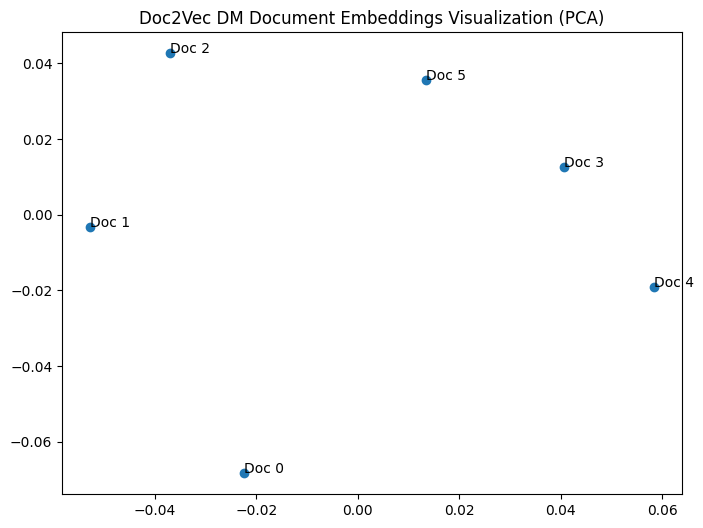

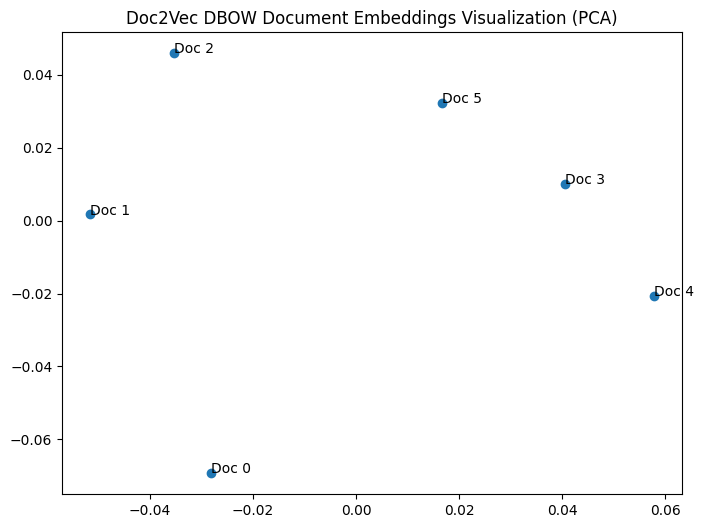

In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os


# Sample corpus
corpus = [
    'The quick brown fox jumps over the lazy dog',
    'Never jump over the lazy dog quickly',
    'A fox is quick and brown',
    'Dogs and foxes are animals',
    'Foxes are clever and quick',
    'Dogs are loyal and friendly'
]

# Tag documents
# Each document is tagged with a unique id
# TaggedDocument(words, [tag])
tagged_data = [TaggedDocument(words=nltk.word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(corpus)]

# --- Distributed Memory (DM) Example ---
doc2vec_dm = Doc2Vec(vector_size=50, window=2, min_count=1, workers=1, epochs=40, seed=42, dm=1)
doc2vec_dm.build_vocab(tagged_data)
doc2vec_dm.train(tagged_data, total_examples=doc2vec_dm.corpus_count, epochs=doc2vec_dm.epochs)
print("\nDM: Vector for first document:", doc2vec_dm.dv['0'])
print("DM: Most similar to first document:", doc2vec_dm.dv.most_similar('0'))

# --- Distributed Bag of Words (DBOW) Example ---
doc2vec_dbow = Doc2Vec(vector_size=50, window=2, min_count=1, workers=1, epochs=40, seed=42, dm=0)
doc2vec_dbow.build_vocab(tagged_data)
doc2vec_dbow.train(tagged_data, total_examples=doc2vec_dbow.corpus_count, epochs=doc2vec_dbow.epochs)
print("\nDBOW: Vector for first document:", doc2vec_dbow.dv['0'])
print("DBOW: Most similar to first document:", doc2vec_dbow.dv.most_similar('0'))

# --- Infer vector for a new document ---
new_doc = 'A quick animal jumps over a lazy dog'
new_vec_dm = doc2vec_dm.infer_vector(nltk.word_tokenize(new_doc.lower()))
print('DM: Inferred vector for new document:', new_vec_dm)
print('DM: Most similar to new document:', doc2vec_dm.dv.most_similar([new_vec_dm]))

new_vec_dbow = doc2vec_dbow.infer_vector(nltk.word_tokenize(new_doc.lower()))
print('DBOW: Inferred vector for new document:', new_vec_dbow)
print('DBOW: Most similar to new document:', doc2vec_dbow.dv.most_similar([new_vec_dbow]))

# --- Visualization (DM) ---
doc_tags = [str(i) for i in range(len(corpus))]
doc_vectors_dm = [doc2vec_dm.dv[tag] for tag in doc_tags]
pca_dm = PCA(n_components=2)
result_dm = pca_dm.fit_transform(doc_vectors_dm)
plt.figure(figsize=(8,6))
plt.scatter(result_dm[:, 0], result_dm[:, 1])
for i, tag in enumerate(doc_tags):
    plt.annotate(f'Doc {tag}', xy=(result_dm[i, 0], result_dm[i, 1]))
plt.title('Doc2Vec DM Document Embeddings Visualization (PCA)')
plt.show()

# --- Visualization (DBOW) ---
doc_vectors_dbow = [doc2vec_dbow.dv[tag] for tag in doc_tags]
pca_dbow = PCA(n_components=2)
result_dbow = pca_dbow.fit_transform(doc_vectors_dbow)
plt.figure(figsize=(8,6))
plt.scatter(result_dbow[:, 0], result_dbow[:, 1])
for i, tag in enumerate(doc_tags):
    plt.annotate(f'Doc {tag}', xy=(result_dbow[i, 0], result_dbow[i, 1]))
plt.title('Doc2Vec DBOW Document Embeddings Visualization (PCA)')
plt.show()



